## numpy实现MLP
#### 一、神经网络
神经网络一般是由输入层、隐藏层、输出层构成、隐藏层可以是1层或者多层，层与层之间互相连接的，如下图所示

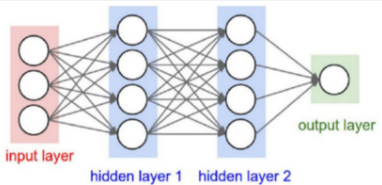

In [1]:
from IPython.display import Image
Image(filename='./images/day10-01.png')

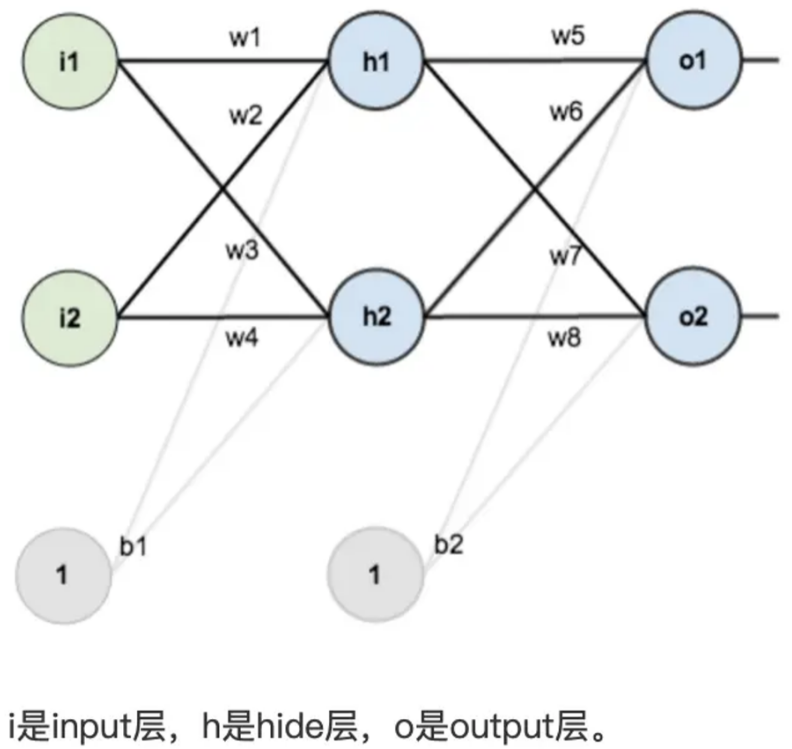

In [2]:
Image(filename='./images/day10-02.png')

#### 神经元
神经元一般常用sigmoid函数，具有激活功能

In [3]:
import numpy as np
def sigmoid(x):
    return x / (1 + np.exp(x))

# derivative of sigmoid
# sigmoid(y) * (1-sigmoid(y))
# the way we use this y is aleady sigmoided
def dsigmoid(y):
    return y * (1.0 - y)

#### 神经网络初始化参数
- 隐藏层参数
- 输出层参数
- 输入层参数
一般用矩阵做所有的这些计算，因为它们速度快，而且非常容易阅读
输入层的大小(特性)、隐藏层的大小（要调优的变量参数）和输出层的数量(可能的类的数量)
> 注意我们将所有的权重初始化成随机数，重要的是权值是随机的，否则我们无法调整网络，如果所有的权重都是一样的，那么所有的隐藏单位都是一样的，那你的神经网络就废了

#### 前馈网络

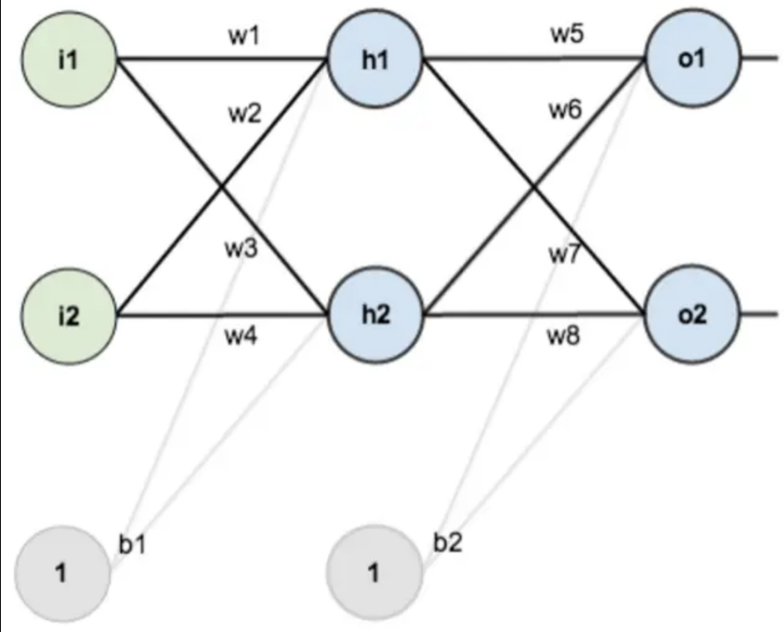

In [4]:
Image(filename='./images/day10-03.png')

#### 第一层计算

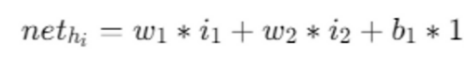

In [5]:
Image(filename='./images/day10-04.png')


#### 第一层激活

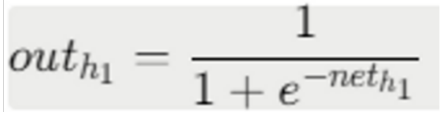

In [6]:
Image(filename='./images/day10-05.png')

#### 第二层计算

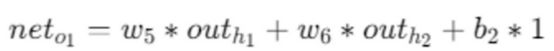

In [7]:
Image(filename='./images/day10-06.png')

#### 第二层激活

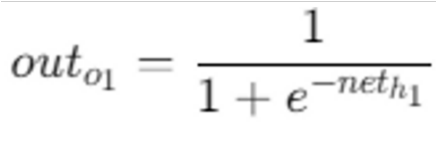

In [9]:
Image(filename='./images/day10-07.png')

#### 4. 反向传播(backpropagate)

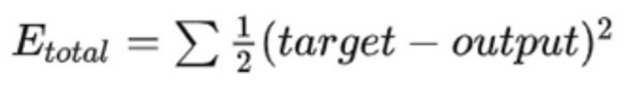

In [11]:
# 统计误差
Image(filename='./images/day10-09.png')

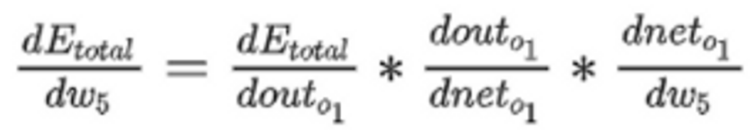

In [12]:
# 反向传播
Image(filename='./images/day10-10.png')

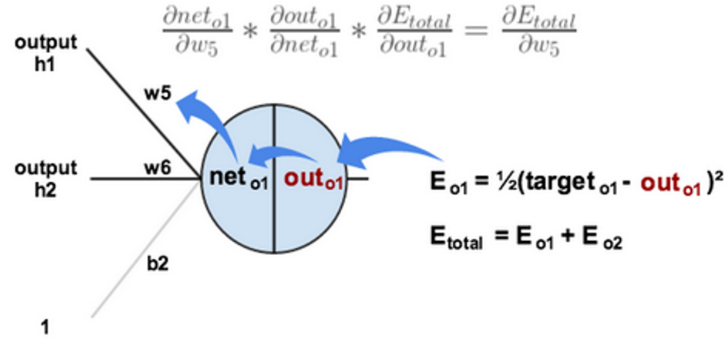

In [13]:
# 输出层BP
Image(filename='./images/day10-11.png')

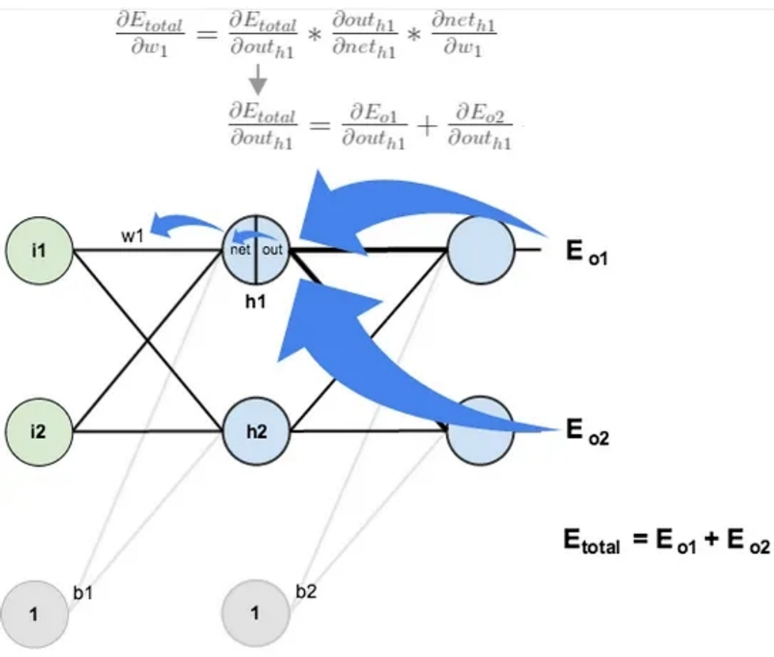

In [15]:
# 隐藏层BP
Image(filename='./images/day10-12.png')

In [16]:
import time
import math
import random
import numpy as np

class MLP_NeuralNetword(object):
    def __init__(self, input, hidden, output, iterations, learning_rate, rate_decay):
        """
        :param input: number of input neurons
        :param hidden: number of hidden neurons
        :param output: number of output neurons
        :param iterations:
        :param learning_rate:
        :param rate_decay:
        """
        # initialize paratemers
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.rate_decay = rate_decay

        self.input = input + 1 # +1 for bias node
        self.hidden = hidden
        self.output = output

        # set up array of ls for activations
        self.ai =  [1.0] * self.input
        self.ah =  [1.0] * self.hidden
        self.ao = [1.0] * self.output

        # create randomized weights
        # use scheme from 'efficient backpropagation to initialize  weights
        input_range = 1.0 / self.input ** (1/2)
        output_range = 1.0 / self.hidden ** (1/2)
        self.wi = np.random.normal(loc = 0, scale=input_range, size=(self.input, self.hidden))
        self.wo = np.random.normal(loc = 0, scale=output_range, size=(self.hidden, self.output))
        # create arrays of 0 for changes
        self.ci = np.zeros((self.input, self.hidden))
        self.co = np.zeros((self.hidden, self.output))

    def feedforward(self, inputs):
        """
        前馈网络
        :param inputs:
        :return:
        """
        if len(inputs) != self.input - 1:
            raise ValueError("Wrong number of inputs you silly goose!")

        # input activations
        for i in range(self.input - 1): # -1 is to avoid the bias
            self.ai[i] = inputs[i]
        # hidden activations
        for i in range(self.hidden):
            sum = 0.0
            for j in range(self.input):
                sum += self.ai[i] * self.wi[i][j]
            self.ah[i] = sigmoid(sum)
        # output activations
        for k in range(self.output):
            sum = 0.0
            for j in range(self.hidden):
                sum += self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum)
        return self.ao[:]

    # 反向传播
    def backpropagate(self, targets):
        """
        :param targets: y value
        :return: updated weights and current error
        """
        if len(targets) != self.output:
            raise ValueError("Wrong numbr of targets you silly gonse")
        # calculate error term for output
        # the delta tell you which direction to change the weights
        output_deltas = [0.0] * self.output
        for k in range(self.output):
            error = -(targets[k] - self.ao[k])
            output_deltas[k] = dsigmoid(self.ao[k]) * error
        # calculate error term for hidden
        # delta tell you which direction to change the weights
        hidden_deltas = [0.0] * self.hidden
        for j in range(self.hidden):
            error = 0.0
            for k in range(self.output):
                error += output_deltas[k] * self.wo[j][k]
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error
        # update the weights connecting hidden to output
        for j in range(self.hidden):
            for k in range(self.output):
                change = output_deltas[k] * self.ah[j]
                self.wo[j][k] -= self.learning_rate * change + self.co[j][k]
                self.co[j][k] = change
        # update the weights connecting input to hidden
        for i in range(self.input):
            for j in range(self.hidden):
                change = hidden_deltas[j] * self.ai[i]
                self.wi[i][j] -= self.learning_rate * change + self.ci[i][j]
                self.ci[i][j] = change
        # calculate error
        error = 0.0
        for k in range(len(targets)):
            error += 0.5 * (targets[k] - self.ao[k]) ** 2
        return error

    #测试
    def test(self, patterns):
        """
        Currently this will print out the targets next to the predictions.
        Not useful for actual ML, just for visual inspection.
        """
        for p in patterns:
            print(p[1], '->', self.feedForward(p[0]))

    #训练
    def train(self, patterns):
        # N: learning rate
        for i in range(self.iterations):
            error = 0.0
            random.shuffle(patterns)
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.feedForward(inputs)
                error += self.backPropagate(targets)
            if i % 10 == 0:
                print("iterations:%d ,lr:%-.5f ,error:%-.5f " % (i,self.learning_rate,error))
            # with open('error.txt', 'a') as errorfile:
            #     errorfile.write(str(error) + '\n')
            #     errorfile.close()
            # if i % 10 == 0:
            #     print('error %-.5f' % error)
            # learning rate decay
            self.learning_rate = self.learning_rate * (self.learning_rate / (self.learning_rate + (self.learning_rate * self.rate_decay)))

    #预测
    def predict(self, X):
        """
        return list of predictions after training algorithm
        """
        predictions = []
        for p in X:
            predictions.append(self.feedForward(p))
        return predictions


    def feedForward(self, inputs):
        if len(inputs) != self.input-1:
            raise ValueError('Wrong number of inputs you silly goose!')
        # input activations
        for i in range(self.input -1): # -1 is to avoid the bias
            self.ai[i] = inputs[i]
        # hidden activations
        for j in range(self.hidden):
            sum = 0.0
            #输入层神经单元计算结果之和
            for i in range(self.input):
                sum += self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum)
        # output activations
        for k in range(self.output):
            sum = 0.0
            #隐藏层神经单元计算结果之和
            for j in range(self.hidden):
                sum += self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum)
        return self.ao[:]

mlp = MLP_NeuralNetword(64, 100, 10, 50, 0.5, 0.01)

In [19]:
print(mlp.wi)
print(mlp.wi.shape)
print(mlp.ai)

[[-0.08401132  0.06720295 -0.08170859 ... -0.27370587 -0.36410065
   0.04988917]
 [ 0.02044297 -0.0092486  -0.13227616 ...  0.02305529  0.05190333
   0.06631509]
 [ 0.1663084  -0.03885078 -0.18991563 ... -0.1129055   0.02647616
   0.07427573]
 ...
 [-0.07918187  0.12707475 -0.2956158  ...  0.17579892 -0.1621353
  -0.03351211]
 [-0.02994219  0.11587446  0.13964805 ... -0.04510554  0.00307947
  -0.03578964]
 [ 0.22405365  0.03579222 -0.01844806 ... -0.32390666 -0.02757349
  -0.15404331]]
(65, 100)
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
